## Advanced Regression Assignment
Build a regression model with regularisation to predict the actual prices of house, given the dataset of previous sale of houses in Australia.

### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy, to enter the market. A regression model with regularisation is required in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house?
- How well those variables describe the price of a house?

### Steps followed:

- Data understanding
- Data cleaning
- Exploratory Data Analysis (EDA)
- Model Building
  - Data preparation
  - Feature selection using RFE
  - Linear Regression
  - Ridge regression
  - Lasso regression
- Interpretation of results

In [1235]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 800)

## Data Understanding

In [1236]:
# Reading the dataset

housing_data_df = pd.read_csv("train.csv")

In [1237]:
# First 5 records of the dataset

housing_data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1238]:
housing_data_df.shape

(1460, 81)

In [1239]:
housing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1240]:
housing_data_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

In [1241]:
# Number of missing values in columns (descending order)

housing_data_df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [1242]:
# check for duplicates

housing_data_df.duplicated().sum()

0

In [1243]:
# Imputing missing values, based on details available from Data dictionary

housing_data_df["PoolQC"] = housing_data_df["PoolQC"].fillna("No Pool")
housing_data_df["MiscFeature"] = housing_data_df["MiscFeature"].fillna("None")
housing_data_df["Alley"] = housing_data_df["Alley"].fillna("No Alley Access")
housing_data_df["Fence"] = housing_data_df["Fence"].fillna("No Fence")
housing_data_df["FireplaceQu"] = housing_data_df["FireplaceQu"].fillna("No Fireplace")
housing_data_df["MasVnrType"] = housing_data_df["MasVnrType"].fillna("None")
housing_data_df["GarageCond"] = housing_data_df["GarageCond"].fillna("None")
housing_data_df["GarageType"] = housing_data_df["GarageType"].fillna("None")
housing_data_df["GarageFinish"] = housing_data_df["GarageFinish"].fillna("None")
housing_data_df["GarageQual"] = housing_data_df["GarageQual"].fillna("No Garage")
housing_data_df["BsmtExposure"] = housing_data_df["BsmtExposure"].fillna("No Basement")
housing_data_df["BsmtFinType1"] = housing_data_df["BsmtFinType1"].fillna("None")
housing_data_df["BsmtFinType2"] = housing_data_df["BsmtFinType2"].fillna("None")
housing_data_df["BsmtCond"] = housing_data_df["BsmtCond"].fillna("None")
housing_data_df["BsmtQual"] = housing_data_df["BsmtQual"].fillna("None")

#Imputing the missing values by median/mode (according to data type) for remaining features
housing_data_df["LotFrontage"] = housing_data_df["LotFrontage"].fillna(housing_data_df["LotFrontage"].median())
housing_data_df["GarageYrBlt"] = housing_data_df["GarageYrBlt"].fillna(housing_data_df["GarageYrBlt"].median())
housing_data_df["MasVnrArea"] = housing_data_df["MasVnrArea"].fillna(housing_data_df["MasVnrArea"].median())
housing_data_df["Electrical"] = housing_data_df["Electrical"].fillna(housing_data_df["Electrical"].mode()[0])

In [1244]:
# Check for missing values again

housing_data_df.isnull().sum().sort_values(ascending=False)

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

In [1245]:
housing_data_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAr

In [1246]:
# Id column not helpful for the analysis, dropping the column

housing_data_df = housing_data_df.drop("Id", axis = 1)

In [1247]:
# Categorical columns
cat_cols = housing_data_df.select_dtypes(include = "object")

# Numerical columns
num_cols = housing_data_df.select_dtypes(exclude = "object")

In [1248]:
cat_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [1249]:
num_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

## Exploratory Data Analysis

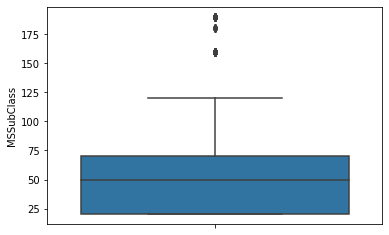

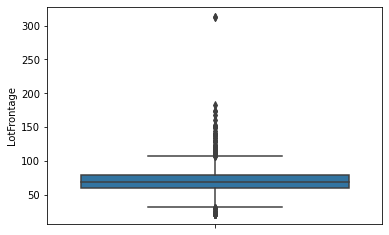

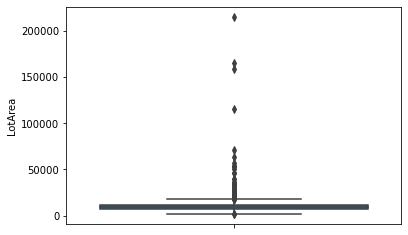

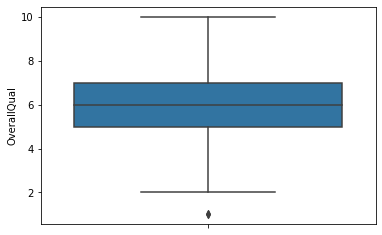

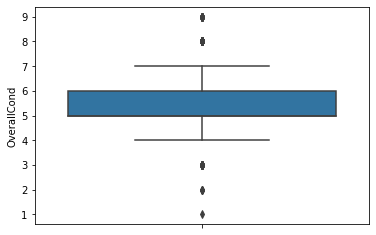

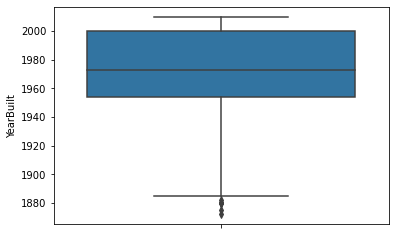

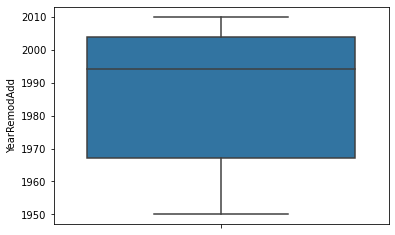

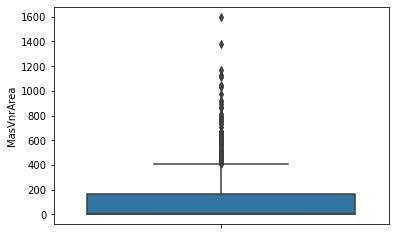

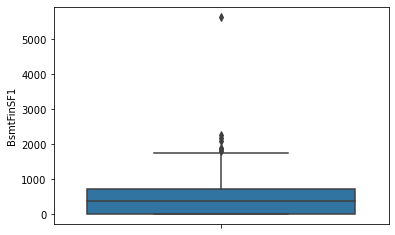

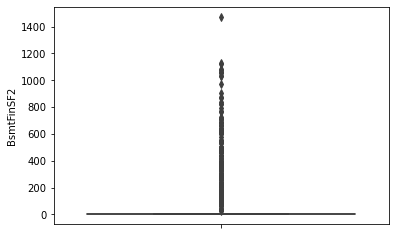

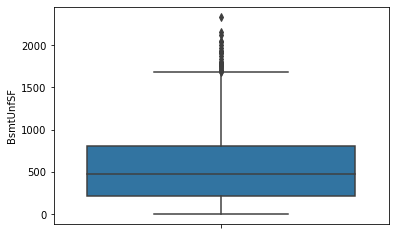

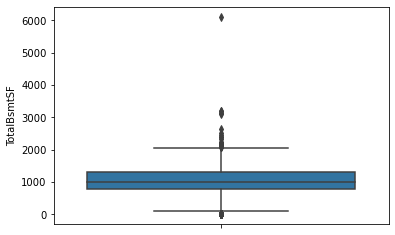

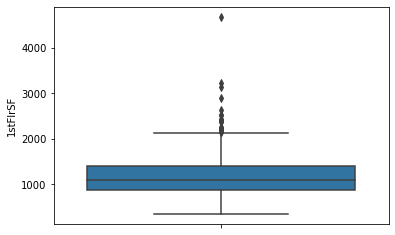

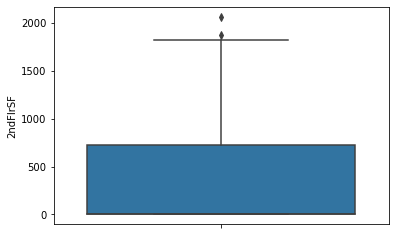

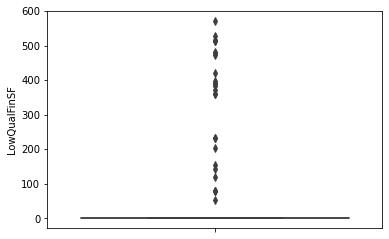

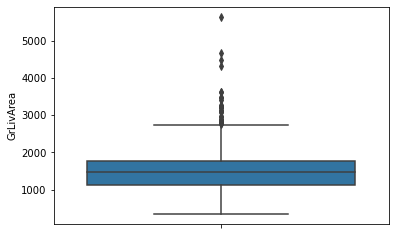

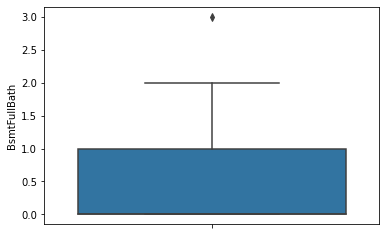

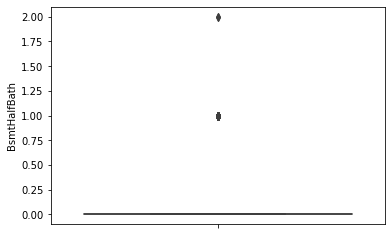

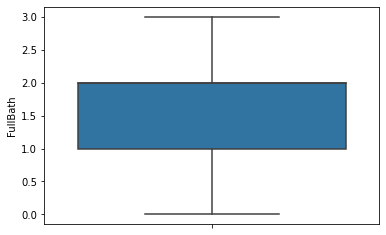

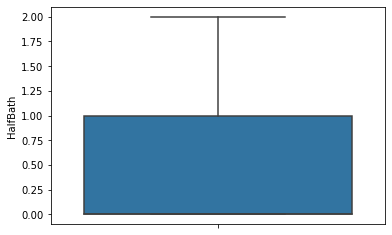

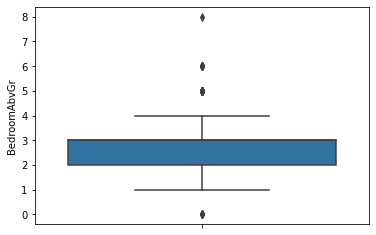

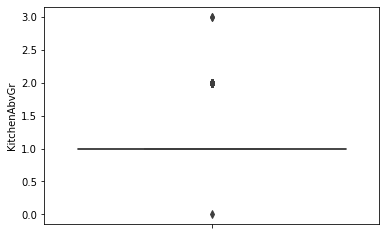

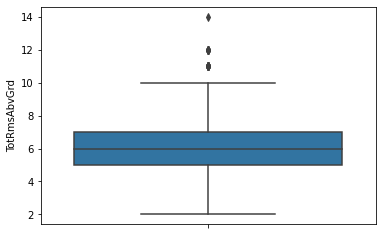

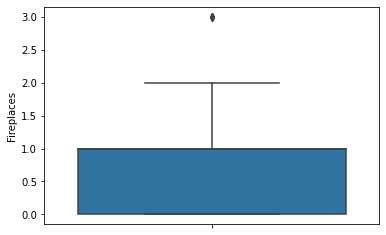

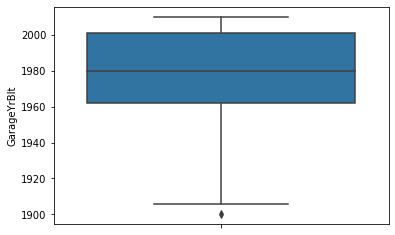

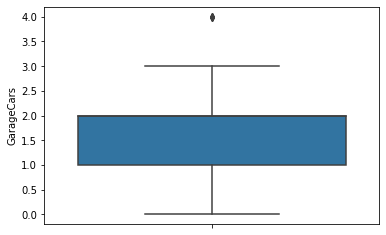

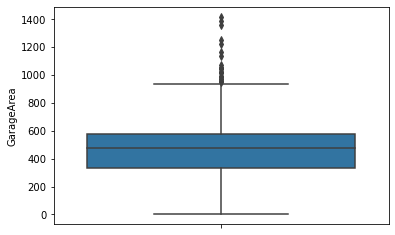

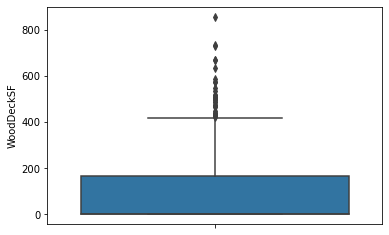

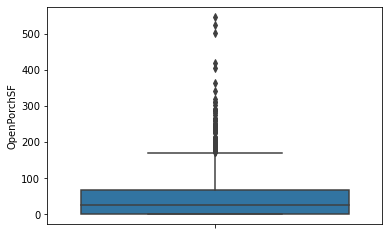

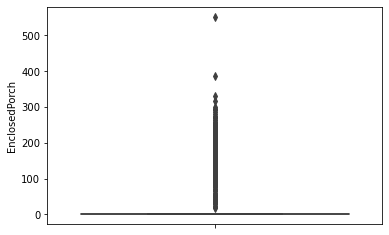

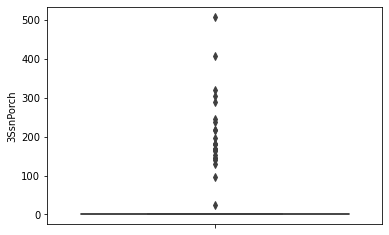

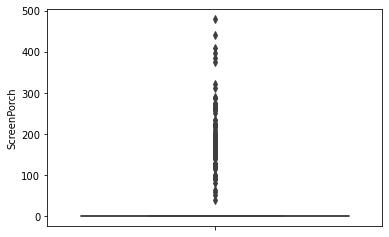

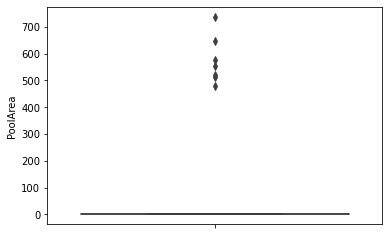

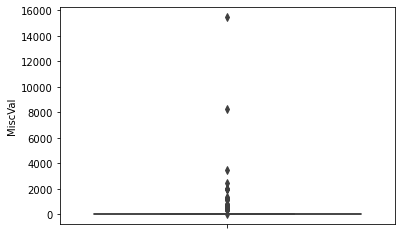

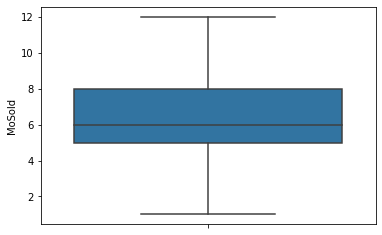

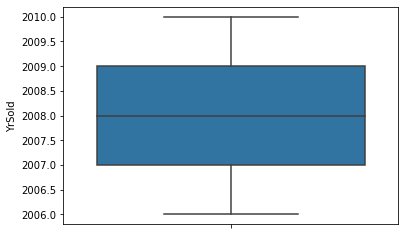

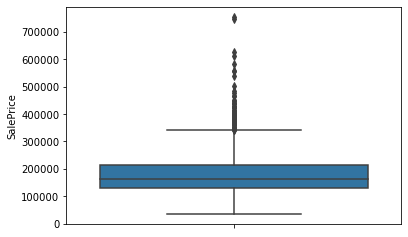

In [1250]:
for col in num_cols:
    plt.subplots()
    sns.boxplot(y = housing_data_df[col])

From the above boxplots, we can clearly see the presence of outliers

In [1251]:
housing_data_df.describe(percentiles = [0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.99, 1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
80%,80.000000,80.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,205.200000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2003.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000

In [1252]:
# removing outliers - using 0.99 percentile as the limit

cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
        'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

for col in cols:
    q1 = housing_data_df[col].quantile(0.25)
    q3 = housing_data_df[col].quantile(0.99)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    housing_data_df = housing_data_df[((house_pricing_df[col] >= lower_bound) & (housing_data_df[col] <= upper_bound))]
    
housing_data_df.shape

(1437, 80)

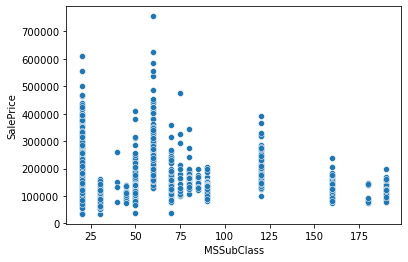

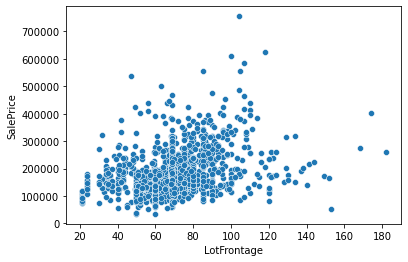

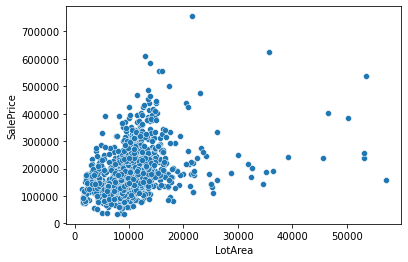

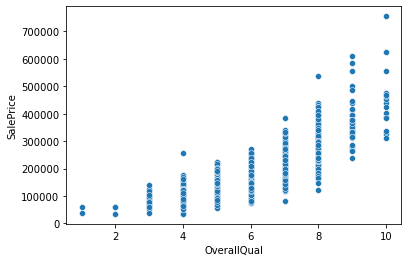

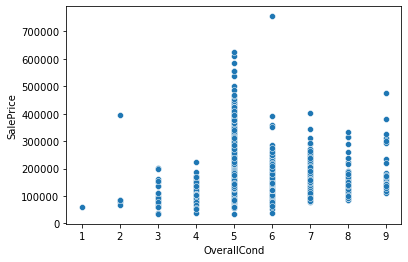

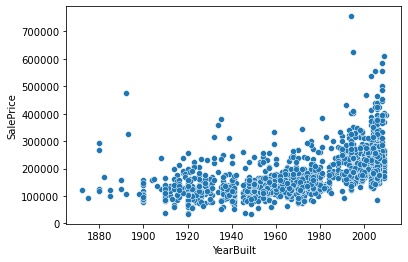

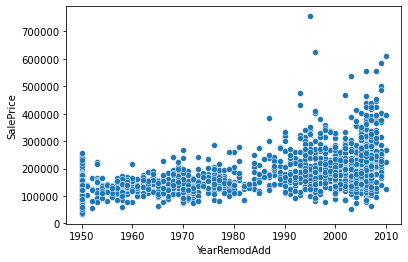

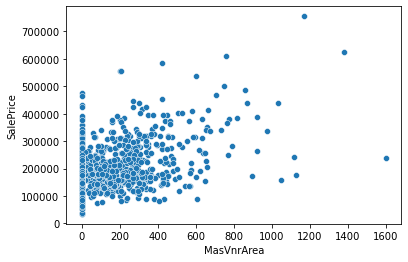

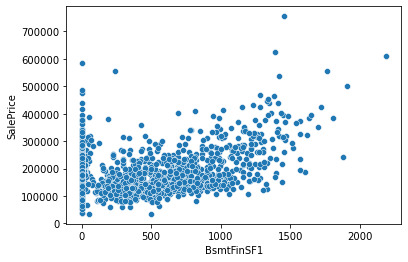

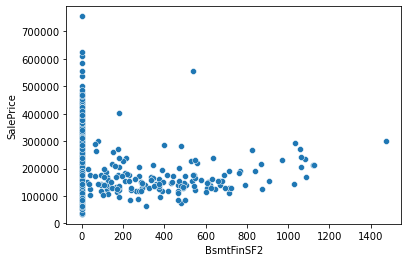

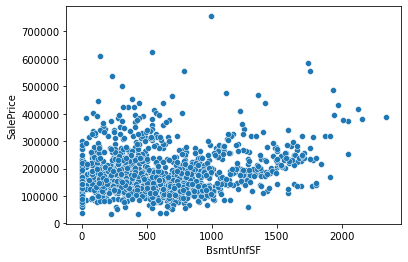

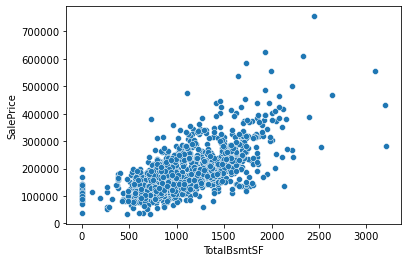

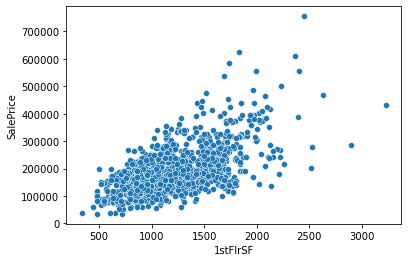

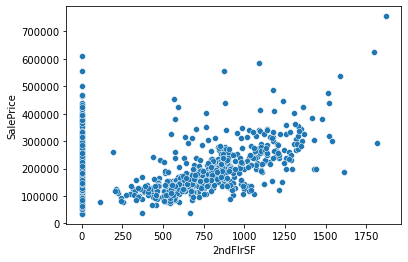

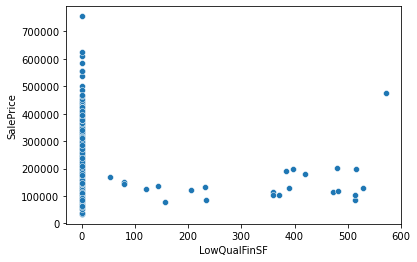

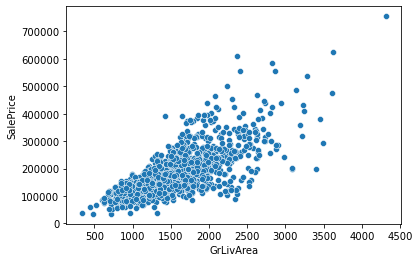

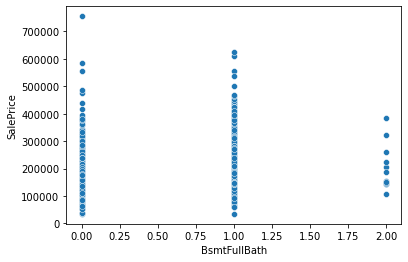

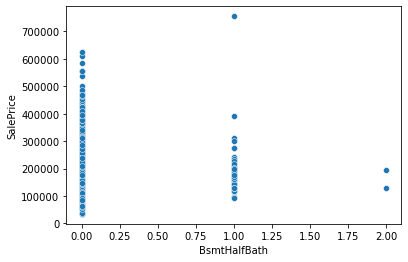

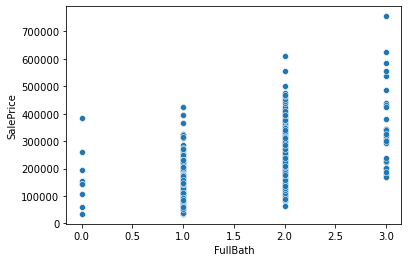

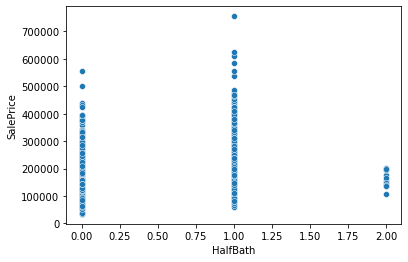

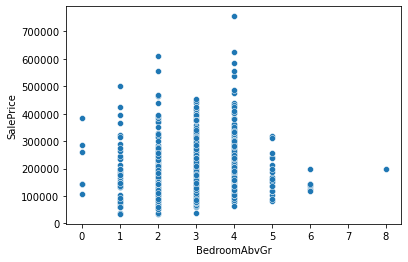

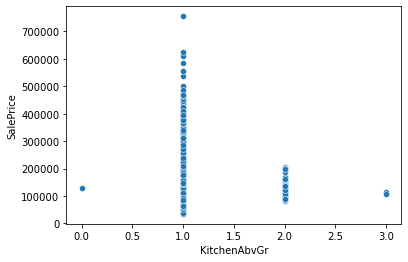

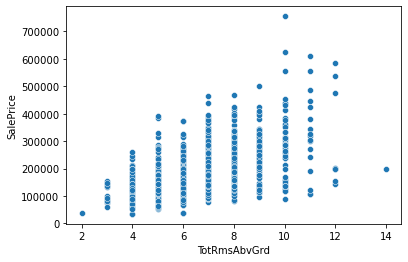

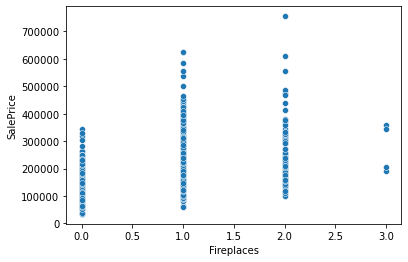

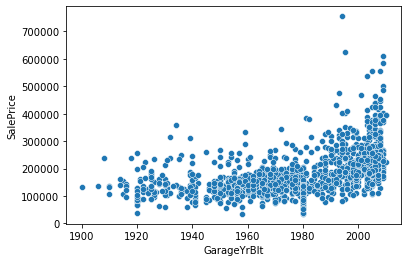

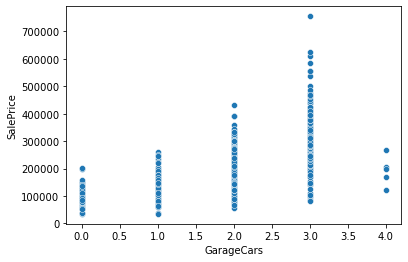

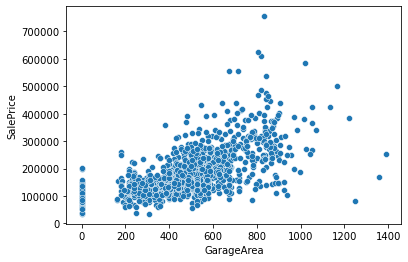

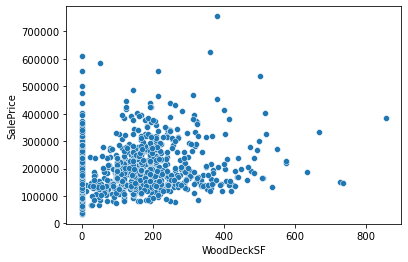

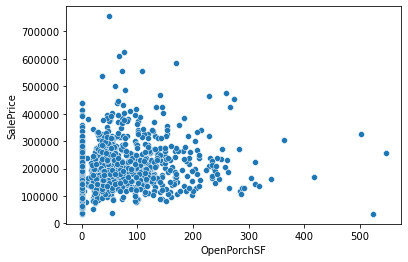

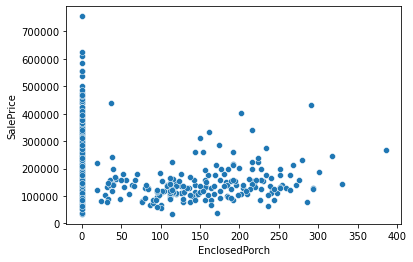

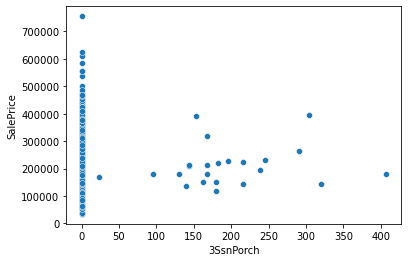

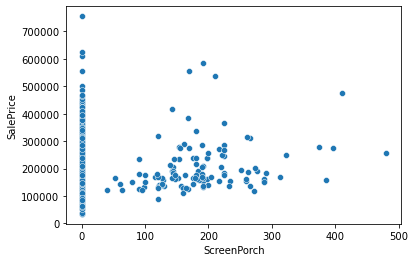

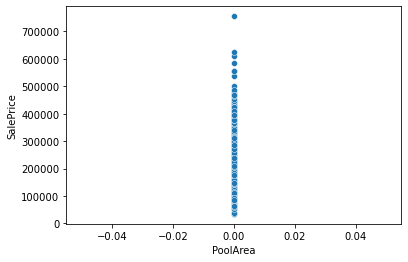

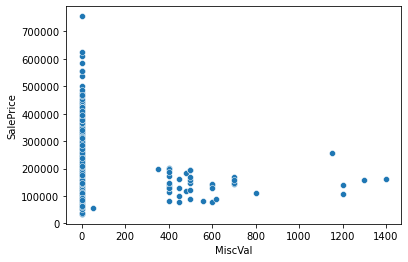

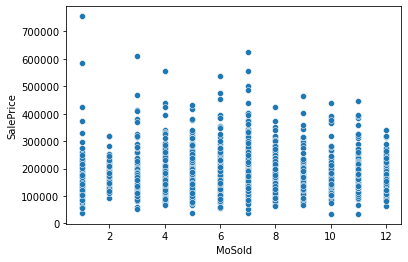

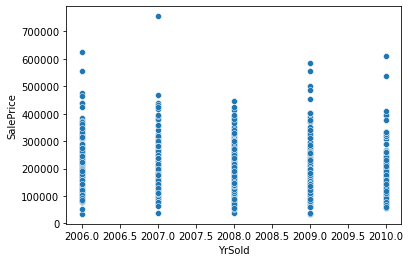

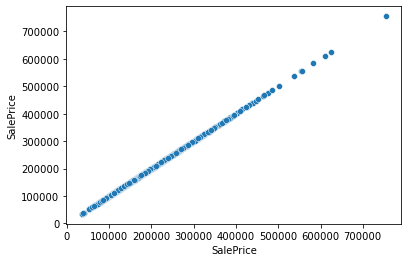

In [1253]:
for col in num_cols:
    plt.subplots()
    sns.scatterplot(x = col, y = "SalePrice", data = housing_data_df)

Observations:

-Living area size, number of rooms in house, gargage area, parking for more cars, more full bathrooms, newer houses (new and remodelled), size of basement have positive impact on Sale Price.

In [1254]:
cat_cols.columns

for col in cat_cols:
    print(housing_data_df[col].value_counts(normalize = True) * 100)
    print("---")

RL         78.566458
RM         15.100905
FV          4.523312
RH          1.113431
C (all)     0.695894
Name: MSZoning, dtype: float64
---
Pave    99.652053
Grvl     0.347947
Name: Street, dtype: float64
---
No Alley Access    93.667363
Grvl                3.479471
Pave                2.853166
Name: Alley, dtype: float64
---
Reg    63.674322
IR1    33.124565
IR2     2.644398
IR3     0.556715
Name: LotShape, dtype: float64
---
Lvl    90.187891
Bnk     4.244955
HLS     3.340292
Low     2.226862
Name: LandContour, dtype: float64
---
AllPub    99.930411
NoSeWa     0.069589
Name: Utilities, dtype: float64
---
Inside     72.303410
Corner     17.884482
CulDSac     6.263048
FR2         3.270703
FR3         0.278358
Name: LotConfig, dtype: float64
---
Gtl    94.989562
Mod     4.384134
Sev     0.626305
Name: LandSlope, dtype: float64
---
NAmes      15.309673
CollgCr    10.368824
OldTown     7.863605
Edwards     6.680585
Somerst     5.984690
Gilbert     5.427975
NridgHt     5.358386
Sawyer      

In [1255]:
# Dropping few columns based on unique values count
cols = ["Street", "Utilities", "Condition2", "RoofMatl", "Heating"]
housing_data_df = housing_data_df.drop(cols, axis=1)

cat_cols.drop(cols, axis=1, inplace=True)

In [1256]:
housing_data_df.shape

(1437, 75)

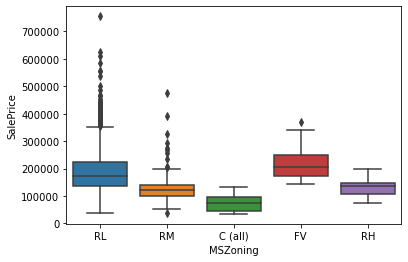

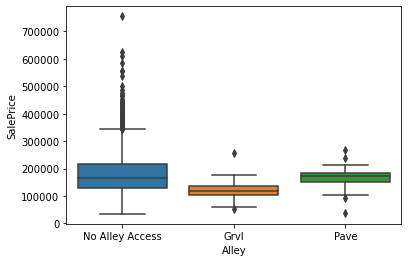

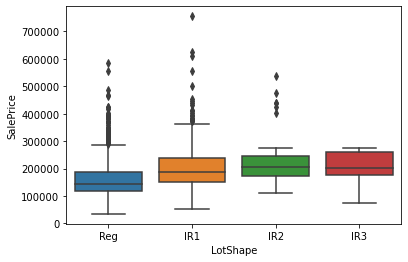

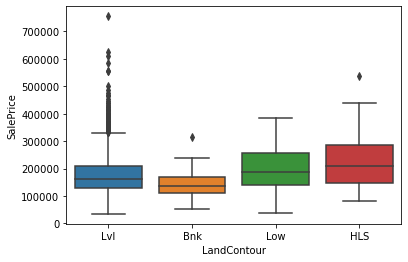

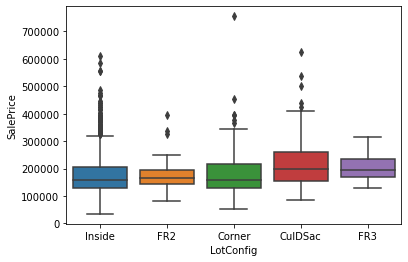

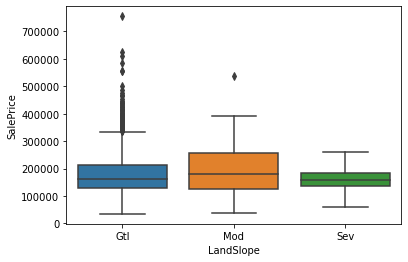

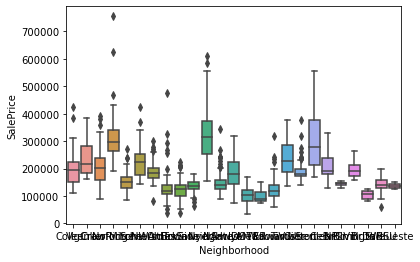

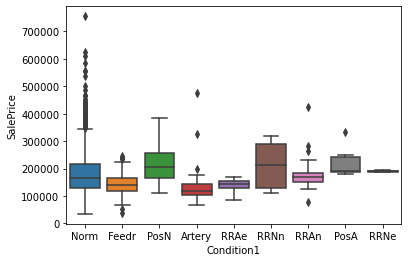

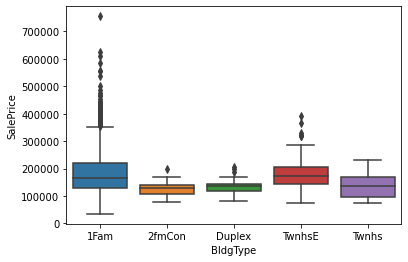

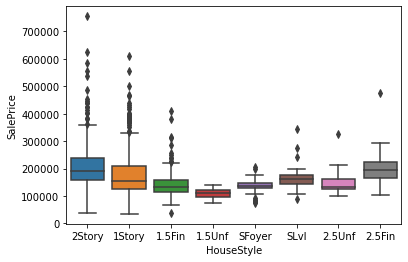

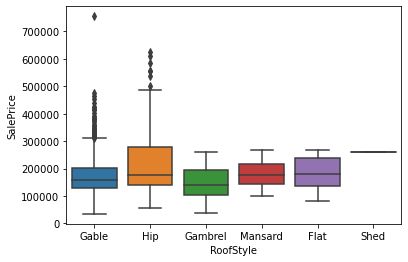

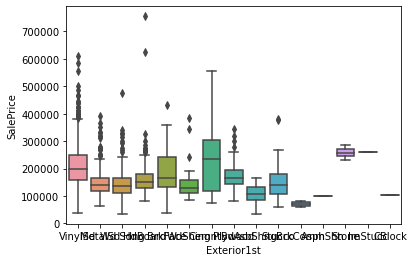

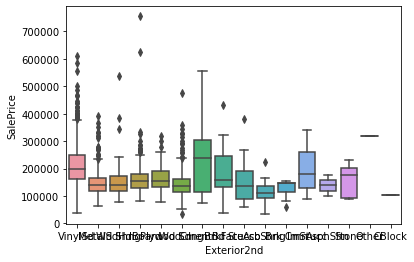

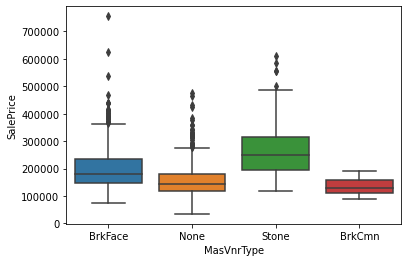

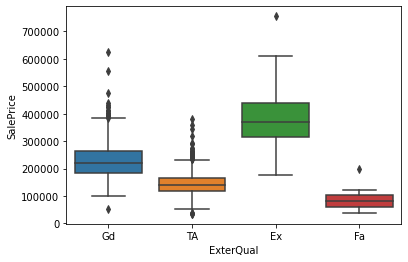

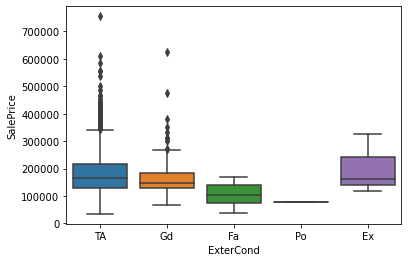

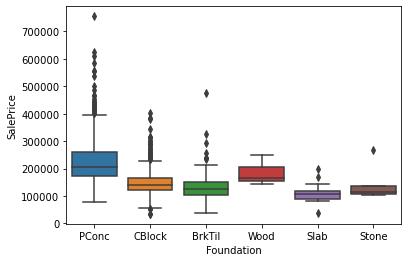

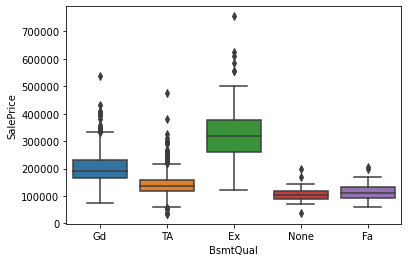

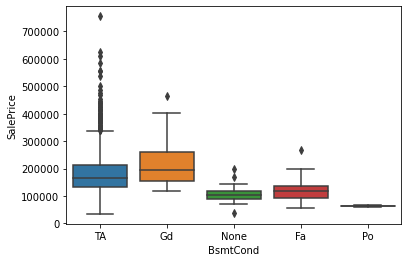

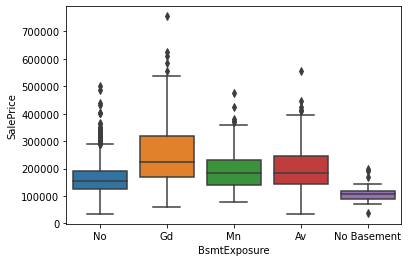

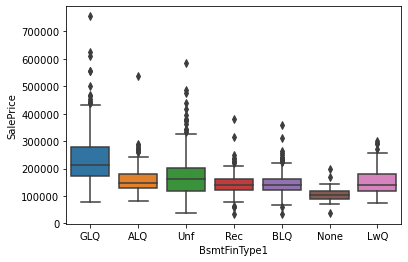

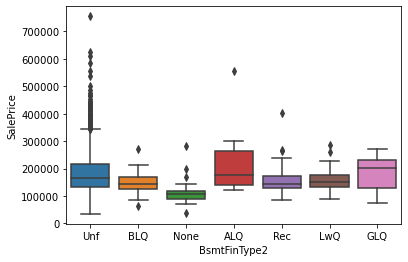

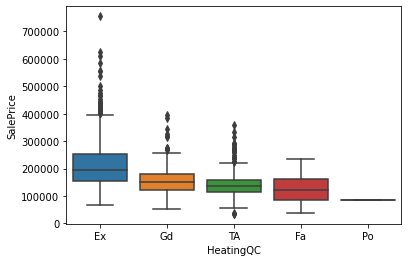

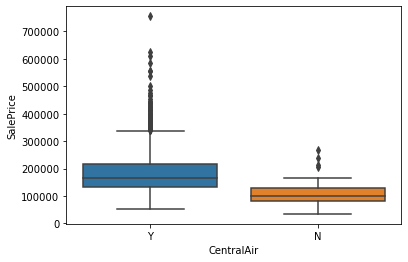

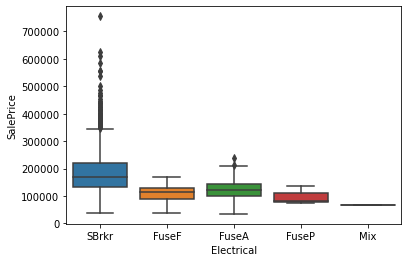

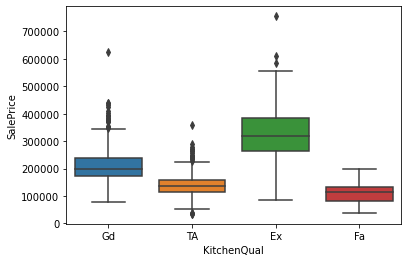

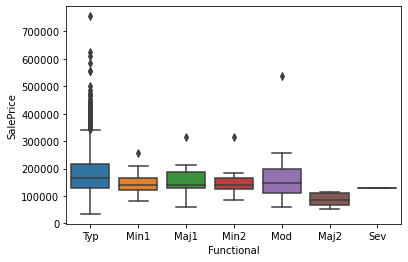

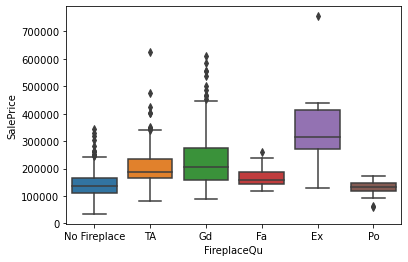

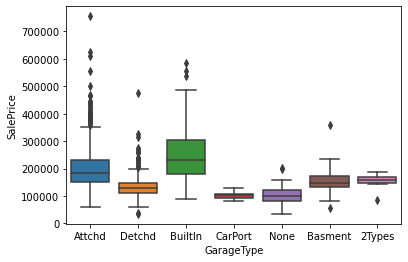

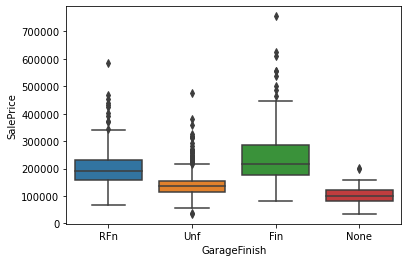

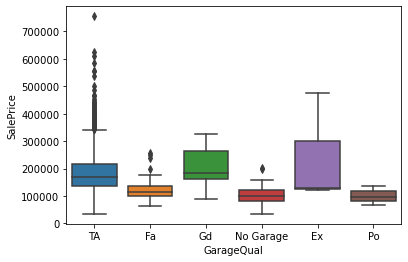

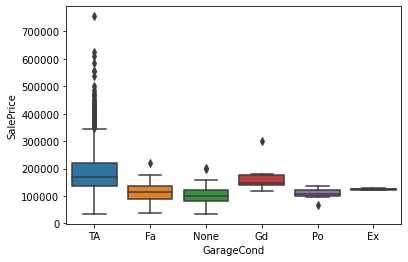

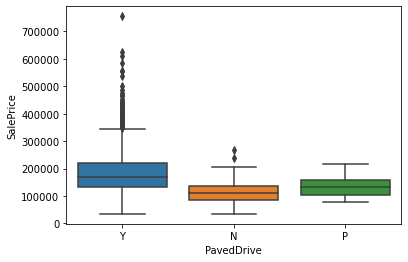

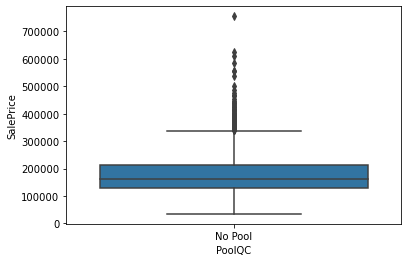

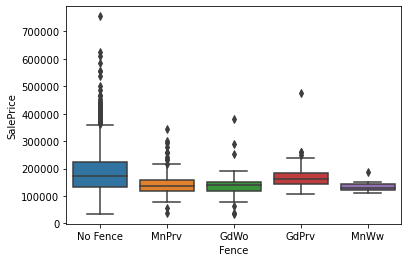

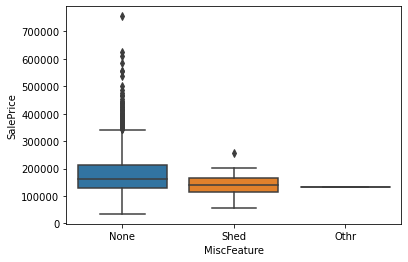

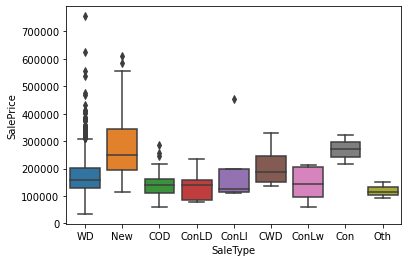

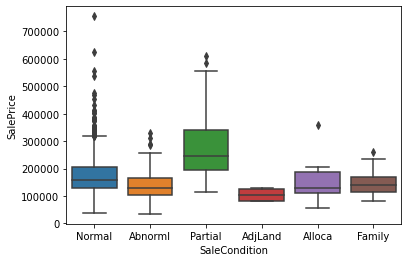

In [1257]:
# Plotting categorical columns

for col in cat_cols:
    plt.subplots()
    sns.boxplot(x = col, y = "SalePrice", data = housing_data_df)

As per above plots, Sale price is high in case of:
- MSZoning is Residential Low Density
- Shape of property is regular and slightly irregular
- General condition is normal
- Dwelling type is single family detached
- House style is 2Story or 1Story
- Roof style is Gable or Hip
- Masonry veneer type is Brick Face or Stone
- If Basement, Garage, External quality and condition is good or excellent.

In [1258]:
def map_quality(x):
    return x.map({10 : "Very Excellent", 9 : "Excellent", 8 : "Good", 7 : "Good", 6 : "Average", 5 : "Average", 4 : "Poor", 3 : "Poor", 2 : "Very Poor", 1 : "Very Poor"})

housing_data_df["OverallQual"] = housing_data_df[["OverallQual"]].apply(map_quality)
housing_data_df["OverallCond"] = housing_data_df[["OverallCond"]].apply(map_quality)

In [1259]:
# Deriving new columns

housing_data_df['AgeYearBuilt'] = housing_data_df['YrSold']-housing_data_df['YearBuilt']
housing_data_df['AgeYearRemodelled'] = housing_data_df['YrSold']-housing_data_df['YearRemodAdd']
housing_data_df['AgeGarage'] = housing_data_df['YrSold']-housing_data_df['GarageYrBlt']

In [1260]:
# Dropping the columns 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' after deriving new variables

housing_data_df = housing_data_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1)

In [1261]:
housing_data_df.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeYearBuilt,AgeYearRemodelled,AgeGarage
count,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,56.844120,69.277662,9949.671538,102.530967,434.755045,45.632568,569.314544,1049.702157,1155.016006,344.069589,5.665275,1504.750870,0.418232,0.057063,1.558803,0.384134,2.860821,1.045929,6.501044,0.601949,1.767571,472.070285,93.194850,46.363257,21.820459,3.110647,14.878914,0.0,17.045233,6.323591,2007.817676,179997.199722,36.525400,23.026444,29.154489
std,42.214658,19.727323,5149.509413,179.437499,430.017679,160.459993,442.697631,412.735648,369.499219,431.983307,47.934060,499.359695,0.510095,0.237971,0.547393,0.502056,0.815144,0.219154,1.604583,0.635703,0.747498,212.211147,123.846773,65.431854,59.850857,26.376102,54.893509,0.0,109.057784,2.703620,1.327928,78095.118892,30.356222,20.687370,24.072166
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7500.000000,0.000000,0.000000,0.000000,225.000000,795.000000,880.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,2007.000000,129900.000000,7.000000,4.000000,7.000000
50%,50.000000,69.000000,9416.000000,0.000000,378.000000,0.000000,481.000000,990.000000,1080.000000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000,162000.000000,35.000000,14.000000,28.000000
75%,70.000000,79.000000,11478.000000,164.000000,706.000000,0.000000,810.000000,1284.000000,1382.000000,728.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000,213000.000000,54.000000,41.000000,46.000000
max,190.000000,182.000000,57200.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,1872.000000,572.000000,4316.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1390.000000,857.000000,547.000000,386.000000,407.000000,480.000000,0.0,1400.000000,12.000000,2010.000000,755000.000000,136.000000,60.000000,107.000000


In [1262]:
# variable 'AgeYearRemodelled' has minimum value of -1 which is invalid, dropping the row

housing_data_df = housing_data_df[~(housing_data_df['AgeYearRemodelled']==-1)]

In [1263]:
housing_data_df.shape

(1437, 75)

<AxesSubplot:>

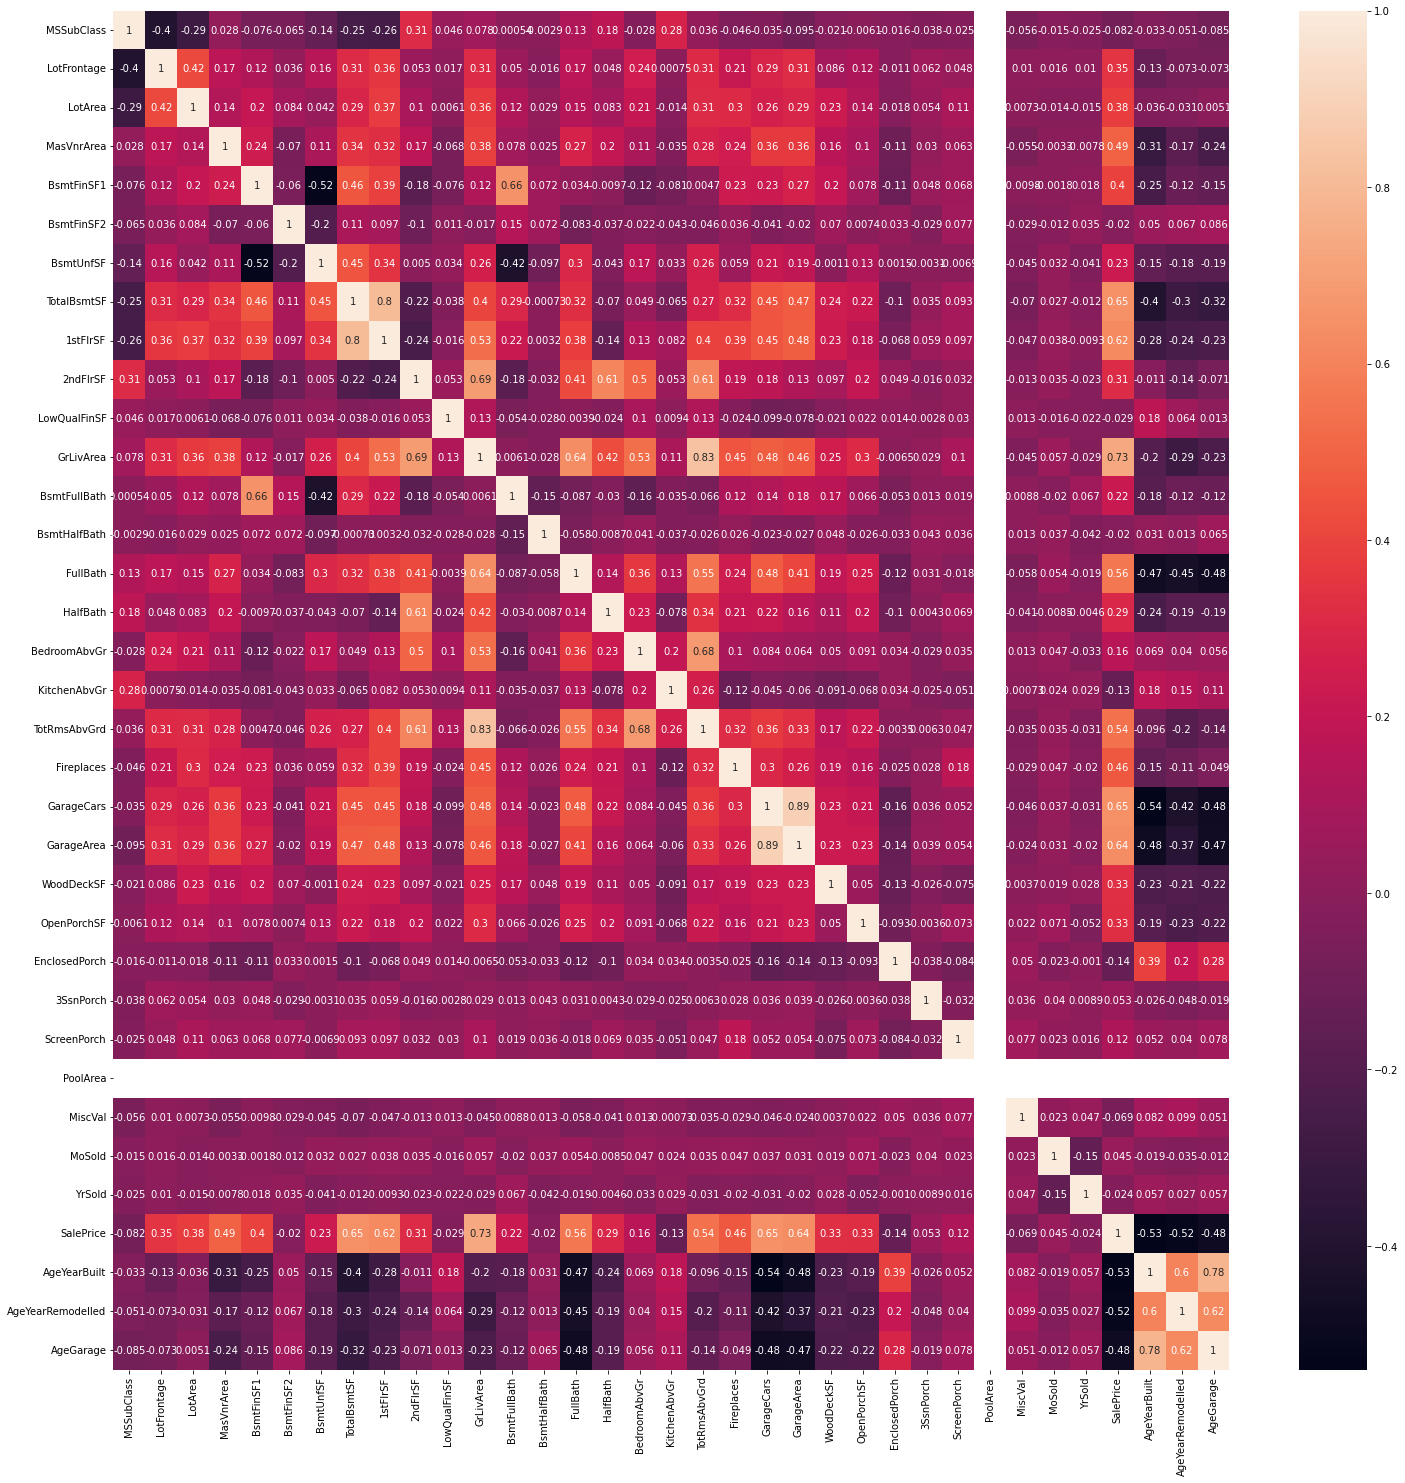

In [1264]:
# Correlation details

plt.subplots(figsize=(25, 25))
sns.heatmap(housing_data_df.corr(), annot=True)

From the above correlation matix:
- "SalePrice" is highly correlated with "GrLivArea", "GarageCars", "TotalBsmtSF".
- "GrLivArea" is highly correlated with "TotRmsAbvGrd"
- "GarageCars" is highly correlated with "GarageArea"
- "AgeYearBuilt" is highly correlated with "AgeGarage"
- "TotalBsmtSF" is highly correlated with "1stFlrSF"

In [1265]:
# Dropping columns

cols = ["TotRmsAbvGrd", "GarageArea", "AgeGarage", "1stFlrSF"]
housing_data_df = housing_data_df.drop(cols, axis = 1)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

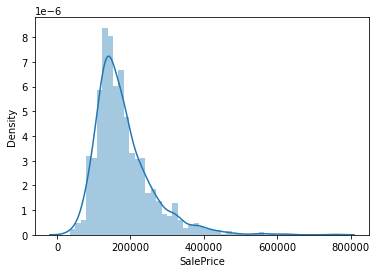

In [1266]:
# check for target variable distribution
sns.distplot(housing_data_df['SalePrice'], hist=True)

In [1267]:
print("Skewness of target variable wihout transformation: %f" % housing_data_df['SalePrice'].skew())
print("Kurtosis of target variable wihout transformation: %f" % housing_data_df['SalePrice'].kurt())

Skewness of target variable wihout transformation: 1.769365
Kurtosis of target variable wihout transformation: 5.512264


Skewness of transformed target variable: 0.116672
Kurtosis of transformed target variable: 0.758986


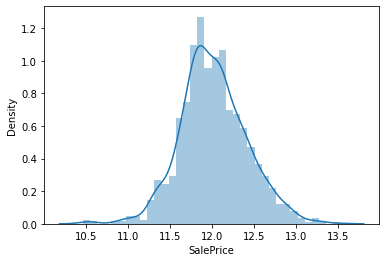

In [1268]:
# Target variable needs transformation to remove skewness

# Performing log transformation 
housing_data_df['SalePrice'] = np.log1p(housing_data_df['SalePrice'])

# re-checkig the variable after transformation:
sns.distplot(housing_data_df['SalePrice'], hist=True)

print("Skewness of transformed target variable: %f" % housing_data_df['SalePrice'].skew())
print("Kurtosis of transformed target variable: %f" % housing_data_df['SalePrice'].kurt())

In [1269]:
cat_cols = housing_data_df.select_dtypes(include = "object")
num_cols = housing_data_df.select_dtypes(exclude = "object")

housing_data_df.shape

(1437, 71)

In [1270]:
# Creating dummy variables for categorical variables
dummies = pd.get_dummies(housing_data_df[cat_cols.columns], drop_first = True)
housing_data_df = pd.concat([housing_data_df, dummies], axis = 1)

# Drop original categorical columns
housing_data_df = housing_data_df.drop(cat_cols.columns, axis = 1)

In [1271]:
housing_data_df.shape

(1437, 237)

## Model building

In [1272]:
# Data split - train and test

np.random.seed(42)
housing_data_train, housing_data_test = train_test_split(housing_data_df, train_size = 0.7, test_size = 0.3, random_state = 42)

In [1273]:
# Scaling the numeric features

scaler = MinMaxScaler()
num_features = list(num_cols.columns)

In [1274]:
housing_data_train[num_features] = scaler.fit_transform(housing_data_train[num_features])
housing_data_train.head()

housing_data_test[num_features] =scaler.transform(housing_data_test[num_features])
housing_data_test.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeYearBuilt,AgeYearRemodelled,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Poor,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
604,0.000000,0.416149,0.205778,0.061875,0.421389,0.0,0.244863,0.466001,0.000000,0.0,0.291311,0.5,0.0,0.666667,0.0,0.375,0.0,0.333333,0.50,0.224037,0.065814,0.0

In [1275]:
# independent and dependent variables - train and test

y_train = housing_data_train.pop("SalePrice")
X_train = housing_data_train

y_test = housing_data_test.pop("SalePrice")
X_test = housing_data_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1005, 236), (1005,), (432, 236), (432,))

In [1276]:
# using RFE to select the top 30 features

lm = LinearRegression()
rfe = RFE(lm, 30, step = 1)
rfe_fit = rfe.fit(X_train, y_train)

In [1277]:
# Ranking of the column by RFE for feature importance:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 67),
 ('LotFrontage', False, 24),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 179),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 21),
 ('LowQualFinSF', False, 142),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 66),
 ('BsmtHalfBath', False, 185),
 ('FullBath', False, 104),
 ('HalfBath', False, 134),
 ('BedroomAbvGr', False, 113),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 152),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 55),
 ('OpenPorchSF', False, 75),
 ('EnclosedPorch', False, 81),
 ('3SsnPorch', False, 82),
 ('ScreenPorch', False, 35),
 ('PoolArea', False, 18),
 ('MiscVal', False, 153),
 ('MoSold', False, 184),
 ('YrSold', False, 172),
 ('AgeYearBuilt', True, 1),
 ('AgeYearRemodelled', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Alley_No Alley Access', False, 151),
 ('Alley_Pave', Fals

In [1278]:
# Picking the features with rank 1

rfe_ranking = pd.DataFrame({'rank' : rfe_fit.ranking_, 'support' : rfe_fit.support_, 'features' : X_train.columns}).sort_values(by = 'rank', ascending = True)

selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1, 'features'].values
selected_features

array(['OverallQual_Very Poor', 'Electrical_Mix', 'Neighborhood_Crawfor',
       'GarageType_None', 'GarageQual_Fa', 'MSZoning_RM', 'MSZoning_RL',
       'MSZoning_RH', 'MSZoning_FV', 'AgeYearRemodelled', 'AgeYearBuilt',
       'GarageQual_Po', 'GarageQual_TA', 'Functional_Maj2',
       'ExterQual_TA', 'GarageCars', 'GarageCond_None', 'Functional_Sev',
       'BsmtFinSF2', 'TotalBsmtSF', 'KitchenAbvGr', 'BsmtFinSF1',
       'GrLivArea', 'Exterior1st_BrkComm', 'SaleType_ConLI',
       'RoofStyle_Shed', 'ExterQual_Fa', 'SaleType_Con', 'ExterQual_Gd',
       'LotArea'], dtype=object)

In [1279]:
# Updated training and testing data

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [1280]:
# Building linear regression model

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

LinearRegression()

In [1281]:
print(lm1.coef_)
print(lm1.intercept_)

[-1.13346323e-01 -1.82567688e+08  5.67060392e-02 -3.73221709e+11
 -4.86407829e-02  9.43085402e-02  1.19496413e-01  1.14423830e-01
  1.32472631e-01 -5.63512743e-02 -6.86749741e-02  1.82567688e+08
 -4.62074801e-02 -1.13048582e-01 -8.74307416e-02  8.60685259e-02
  3.73221709e+11 -1.85921226e-01  2.76736687e-02  1.33023836e-01
 -1.12101256e-01  7.56338481e-02  4.28393032e-01 -2.44343278e-01
 -6.25957969e-02  6.02637771e-02 -1.10746562e-01  5.74916753e-02
 -6.10614568e-02  9.25026145e-02]
0.318581528719444


In [1282]:
y_pred_train = lm1.predict(X_train)
y_pred_test = lm1.predict(X_test)

In [1283]:
# Metrics evaluation

lm1_r2_train = r2_score(y_train, y_pred_train)
lm1_r2_test = r2_score(y_test, y_pred_test)

lm1_mse_train = mean_squared_error(y_train, y_pred_train)
lm1_mse_test = mean_squared_error(y_test, y_pred_test)

lm1_rmse_train = lm1_mse_train ** 0.5
lm1_rmse_test = lm1_mse_test ** 0.5

print("Train R2 score: ", lm1_r2_train)
print("Test R2 score: ", lm1_r2_test)
print()
print("Train MSE: ", lm1_mse_train)
print("Test MSE: ", lm1_mse_test)
print()
print("Train RMSE: ", lm1_rmse_train)
print("Test RMSE: ", lm1_rmse_test)

Train R2 score:  0.8945311781928462
Test R2 score:  -9985637383799748.0

Train MSE:  0.0018051379668540034
Test MSE:  154310002945767.94

Train RMSE:  0.0424869152428604
Test RMSE:  12422157.741140142


In [1284]:
# Storing all results 

lm_metric = [round(lm1_r2_train,3), round(lm1_r2_test,3), 
             round(lm1_mse_train,3), round(lm1_mse_test,3), 
             round(lm1_rmse_train,3), round(lm1_rmse_test,3)]

lm_metric

[0.895, -9985637383799748.0, 0.002, 154310002945767.94, 0.042, 12422157.741]

In [1285]:
# Params for tuning the regularized model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [1286]:
# Trying Ridge method

ridge = Ridge()
folds = 5

model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1287]:
# Check the best alpha value

model_ridge.best_params_

{'alpha': 0.2}

In [1288]:
# Using the best alpha value

alpha = 0.2
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=0.2)

In [1289]:
# model co-efficients

ridge.coef_

array([-0.10213068, -0.02664735,  0.05694053, -0.03327109, -0.04553862,
        0.08327911,  0.10811871,  0.10167975,  0.12041376, -0.05689504,
       -0.06854439, -0.02664735, -0.04332417, -0.10878681, -0.0868857 ,
        0.08714982, -0.03327109, -0.15289404,  0.02667712,  0.13278289,
       -0.10861856,  0.07635031,  0.42151417, -0.20313573, -0.05887994,
        0.04980966, -0.11241945,  0.04879368, -0.05989663,  0.09228273])

In [1290]:
# Predicted results

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [1291]:
# Metrics evaluation

ridge_r2_train = r2_score(y_train, y_pred_train)
ridge_r2_test = r2_score(y_test, y_pred_test)

ridge_mse_train = mean_squared_error(y_train, y_pred_train)
ridge_mse_test = mean_squared_error(y_test, y_pred_test)

ridge_rmse_train = ridge_mse_train ** 0.5
ridge_rmse_test = ridge_mse_test ** 0.5

print("Train R2 score: ", ridge_r2_train)
print("Test R2 score: ", ridge_r2_test)
print()
print("Train MSE: ", ridge_mse_train)
print("Test MSE: ", ridge_mse_test)
print()
print("Train RMSE: ", ridge_rmse_train)
print("Test RMSE: ", ridge_rmse_test)

Train R2 score:  0.8943627975227197
Test R2 score:  0.8763883167491047

Train MSE:  0.001808019864416919
Test MSE:  0.0019101954610852012

Train RMSE:  0.042520816836191175
Test RMSE:  0.043705782924976885


In [1292]:
# Storing all results 

ridge_metric = [round(ridge_r2_train,3), round(ridge_r2_test,3), 
                round(ridge_mse_train,3), round(ridge_mse_test,3), 
                round(ridge_rmse_train,3), round(ridge_rmse_test,3)]

ridge_metric

[0.894, 0.876, 0.002, 0.002, 0.043, 0.044]

In [1293]:
# using GridSearchCV with 5 folds to find the best alpha for Lasso Model
lasso = Lasso()
folds = 5

model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1294]:
# Checking the best alpha value

model_lasso.best_params_

{'alpha': 0.0001}

In [1295]:
# using the best alpha for Lasso model

alpha = 0.0001
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [1296]:
# Co-efficients given by model

lasso.coef_

array([-0.06664409, -0.        ,  0.05395164, -0.03610143, -0.01029338,
        0.03755647,  0.06371589,  0.05181452,  0.07408812, -0.05872798,
       -0.06930597, -0.        , -0.0119561 , -0.09603364, -0.07835948,
        0.08578059, -0.        , -0.07925331,  0.01928805,  0.13226156,
       -0.10068791,  0.0775735 ,  0.42730717, -0.14260078, -0.03099851,
        0.        , -0.11425561,  0.        , -0.05152104,  0.08223436])

In [1297]:
# Predicted results

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [1298]:
# Metic Evaluation

lasso_r2_train = r2_score(y_train, y_pred_train)
lasso_r2_test = r2_score(y_test, y_pred_test)

lasso_mse_train = mean_squared_error(y_train, y_pred_train)
lasso_mse_test = mean_squared_error(y_test, y_pred_test)

lasso_rmse_train = lasso_mse_train ** 0.5
lasso_rmse_test = lasso_mse_test ** 0.5

print("Train R2 score: ", lasso_r2_train)
print("Test R2 score: ", lasso_r2_test)
print()
print("Train MSE: ", lasso_mse_train)
print("Test MSE: ", lasso_mse_test)
print()
print("Train RMSE: ", lasso_rmse_train)
print("Test RMSE: ", lasso_rmse_test)

Train R2 score:  0.8901021836905665
Test R2 score:  0.8738710618878271

Train MSE:  0.0018809418489308446
Test MSE:  0.0019490950916374943

Train RMSE:  0.04336982648029439
Test RMSE:  0.044148557073108226


In [1299]:
# Storing results

lasso_metric = [round(lasso_r2_train,3), round(lasso_r2_test,3), 
                round(lasso_mse_train,3), round(lasso_mse_test,3), 
                round(lasso_rmse_train,3), round(lasso_rmse_test,3)]

lasso_metric

[0.89, 0.874, 0.002, 0.002, 0.043, 0.044]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

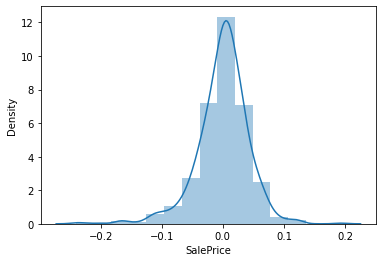

In [1300]:
# Residual Analysis

y_pred_train = lm1.predict(X_train)
sns.distplot(y_train - y_pred_train, bins = 15)

<AxesSubplot:ylabel='SalePrice'>

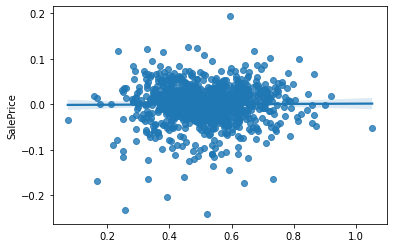

In [1301]:
sns.regplot(y_pred_train, y_train - y_pred_train)

From the above two plots, we can say, our model does not violates any assumptions of linear regression.

- Residuals follow normal distribution around mean 0.
- There is no visible pattern in the residuals plot.

## Results Interpretation

In [1302]:
# Comparing metrics

metrics = pd.DataFrame({"Metric" : ["Train R2", "Test R2", "Train MSE", "Test MSE", "Train RMSE", "Test RMSE"],
                      "Linear Regression" : lm_metric,
                      "Ridge" : ridge_metric,
                      "Lasso" : lasso_metric})

metrics

,Metric,Linear Regression,Ridge,Lasso
0,Train R2,8.950000e-01,0.894,0.890
1,Test R2,-9.985637e+15,0.876,0.874
2,Train MSE,2.000000e-03,0.002,0.002
3,Test MSE,1.543100e+14,0.002,0.002
4,Train RMSE,4.200000e-02,0.043,0.043
5,Test RMSE,1.242216e+07,0.044,0.044


## From the above table:
## - Linear regression model : Overfitting
## - Ridge and Lasso are performing better

In [1303]:
# Comparing co-efficients

coefficients = pd.DataFrame({"Feature" : X_train.columns,
                     "Linear Regression" : lm1.coef_,
                     "Ridge" : ridge.coef_,
                     "Lasso" : lasso.coef_})

coefficients

,Feature,Linear Regression,Ridge,Lasso
0,OverallQual_Very Poor,-1.133463e-01,-0.102131,-0.066644
1,Electrical_Mix,-1.825677e+08,-0.026647,-0.000000
2,Neighborhood_Crawfor,5.670604e-02,0.056941,0.053952
3,GarageType_None,-3.732217e+11,-0.033271,-0.036101
4,GarageQual_Fa,-4.864078e-02,-0.045539,-0.010293
5,MSZoning_RM,9.430854e-02,0.083279,0.037556
6,MSZoning_RL,1.194964e-01,0.108119,0.063716
7,MSZoning_RH,1.144238e-01,0.101680,0.051815
8,MSZoning_FV,1.324726e-01,0.120414,0.074088
9,AgeYearRemodelled,-5.635127e-02,-0.056895,-0.058728


## Even though Ridge and Lasso are performing better, preferring Lasso model as few of the co-efficients pushed to zero

In [1304]:
# Final Lasso model
alpha = 0.0001
lasso = Lasso(alpha = alpha)

#fitting model
lasso.fit(X_train, y_train)

#predicting house prices
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

#looking at r2 score(metric)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)

Train R2 Score: 0.8901021836905665
Test R2 Score: 0.8738710618878271


In [1305]:
coefficients[["Feature", "Lasso"]]

,Feature,Lasso
0,OverallQual_Very Poor,-0.066644
1,Electrical_Mix,-0.000000
2,Neighborhood_Crawfor,0.053952
3,GarageType_None,-0.036101
4,GarageQual_Fa,-0.010293
5,MSZoning_RM,0.037556
6,MSZoning_RL,0.063716
7,MSZoning_RH,0.051815
8,MSZoning_FV,0.074088
9,AgeYearRemodelled,-0.058728


### Conclusion:

Linear Regresion Model : Overfitting observed

Ridge Model:
- Optimal value of lambda for Ridge regression is 0.2
- Train and Test R2 values are 0.894 and 0.876

Lasso Model:
- Optimal value of lambda for Lasso regression is 0.0001
- Train and Test R2 values are 0.890 and 0.874

Top 10 variables that are significant in predicting the price of a house obtained from Lasso regression are:
- GrLivArea (0.427307)
- Exterior1st_BrkComm (-0.142601)
- TotalBsmtSF (0.132262)
- ExterQual_Fa (-0.114256)
- KitchenAbvGr (-0.100688)
- Functional_Maj2 (-0.096034)
- GarageCars (0.085781)
- LotArea (0.082234)
- Functional_Sev (-0.079253)
- ExterQual_TA (-0.078359)